In [1]:
%pwd

'c:\\Users\\redoa\\workspace\\projects\\Second_sentiment_analysis'

# Preparation

In [2]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib

plt.rcParams["figure.figsize"] = (12, 6)
sns.set()
pd.set_option("display.max_columns", None)

import zipfile
import shutil

#### Load data

In [3]:
import tensorflow as tf
from tensorboard.plugins import projector
from tensorflow.keras.datasets import imdb
(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)

Checking data

In [4]:
train_samples

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

get words

In [5]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

We can find that is dict dataset. Check the first 10 values.

In [6]:
words = [(k, v) for k, v in word_index.items()]
words = sorted(words, key=lambda x: x[1])
words[:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

# Preprocessing

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_samples,
              value=0,
            #   padding="post",
              maxlen=500)

len(train_data[0])

500

In [8]:
train_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
test_data = pad_sequences(test_samples,
              value=0,
            #   padding="post",
              maxlen=500)

len(test_data[0])

500

#### Split train data into train and validation

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [11]:
print(X_train.shape, X_valid.shape, test_data.shape)

(20000, 500) (5000, 500) (25000, 500)


# Model construction

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, GlobalAveragePooling1D, Dropout

vocab_size = 10000

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=500),
    # GlobalAveragePooling1D(),
    Flatten(),
    Dense(128, activation="relu"),
    # Dropout(0.1),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 64000)             0         
                                                                 
 dense (Dense)               (None, 128)               8192128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,472,257
Trainable params: 9,472,257
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [14]:
history = model.fit(X_train,
                   y_train,
                   epochs=15,
                   batch_size=5500,
                   validation_data=(X_valid, y_valid),
                   verbose=1)

Epoch 1/15
4/4 [==============================] - 2s 103ms/step - loss: 0.8953 - accuracy: 0.5011 - val_loss: 0.7349 - val_accuracy: 0.5006
Epoch 2/15
4/4 [==============================] - 0s 61ms/step - loss: 0.6944 - accuracy: 0.5416 - val_loss: 0.7033 - val_accuracy: 0.5208
Epoch 3/15
4/4 [==============================] - 0s 61ms/step - loss: 0.6704 - accuracy: 0.5791 - val_loss: 0.6803 - val_accuracy: 0.5218
Epoch 4/15
4/4 [==============================] - 0s 61ms/step - loss: 0.6305 - accuracy: 0.6421 - val_loss: 0.6603 - val_accuracy: 0.5978
Epoch 5/15
4/4 [==============================] - 0s 61ms/step - loss: 0.5922 - accuracy: 0.7121 - val_loss: 0.6251 - val_accuracy: 0.6258
Epoch 6/15
4/4 [==============================] - 0s 61ms/step - loss: 0.5308 - accuracy: 0.7480 - val_loss: 0.5568 - val_accuracy: 0.7396
Epoch 7/15
4/4 [==============================] - 0s 62ms/step - loss: 0.4414 - accuracy: 0.8200 - val_loss: 0.4828 - val_accuracy: 0.7900
Epoch 8/15
4/4 [==========

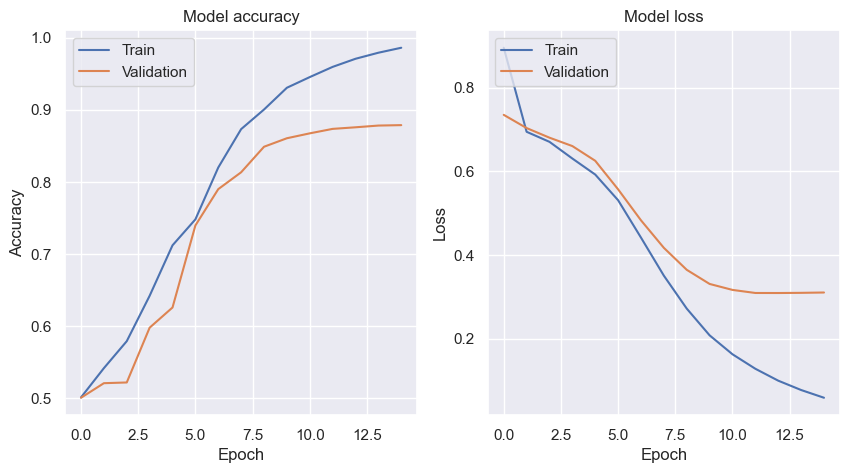

In [15]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def make_report(model, X, y, label_1, label_2):
    """This function lets Classification_report, Confusion Matrix(Heat map) and ROC-AUC out. FOR BINARY CLASSIFICATION ONLY"""
    
    # Classification_report
    y_pred = model.predict(X)
    cr = classification_report(y_true=y, y_pred=y_pred>0.75)
    print(cr)
    
    # Confusion Matrix(Heat map)
    cm = confusion_matrix(y_true=y, y_pred=y_pred>0.75)
    cm_heat = pd.DataFrame(data=cm, index=[label_1, label_2], 
                           columns=[label_1, label_2])
    sns.heatmap(cm_heat, square=True, annot=True, cmap="Spectral")
    plt.xlabel("Pred")
    plt.ylabel("True")
    plt.yticks(rotation=0)
    plt.show()
    

    # ROC-AUC

    fpr, tpr, thresholds = roc_curve(y, y_pred)
    ac = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%ac)
    plt.fill_between(fpr, tpr, 0, color="red", alpha=0.1)
    plt.legend()
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    # plt.grid()
    plt.show()

157/157 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2500
           1       0.93      0.77      0.84      2500

    accuracy                           0.86      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.86      0.86      5000



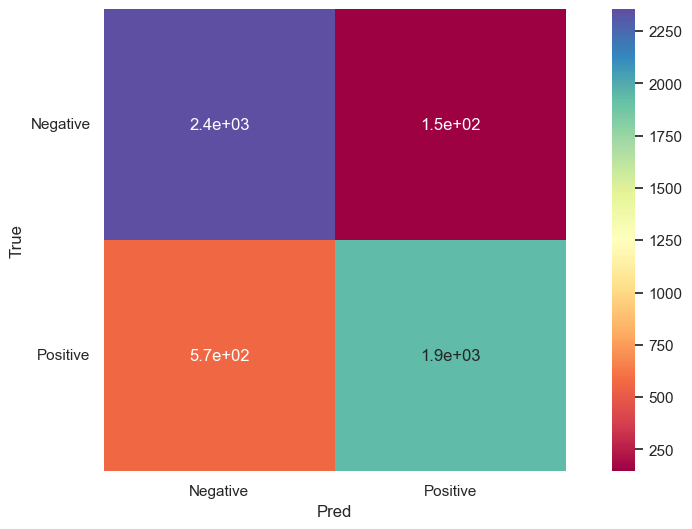

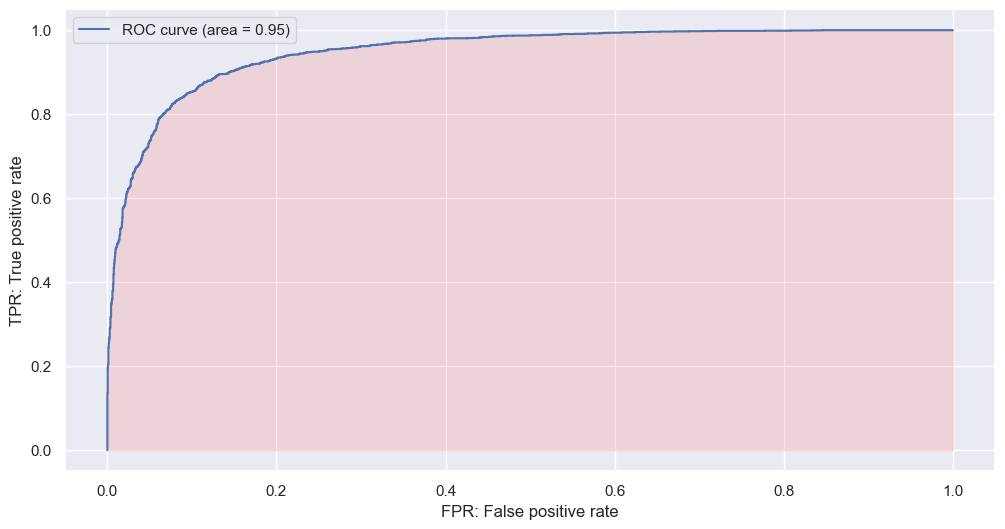

In [17]:
make_report(model, X_valid, y_valid, "Negative", "Positive")

782/782 [==============================] - 1s 936us/step
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     12500
           1       0.93      0.75      0.83     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



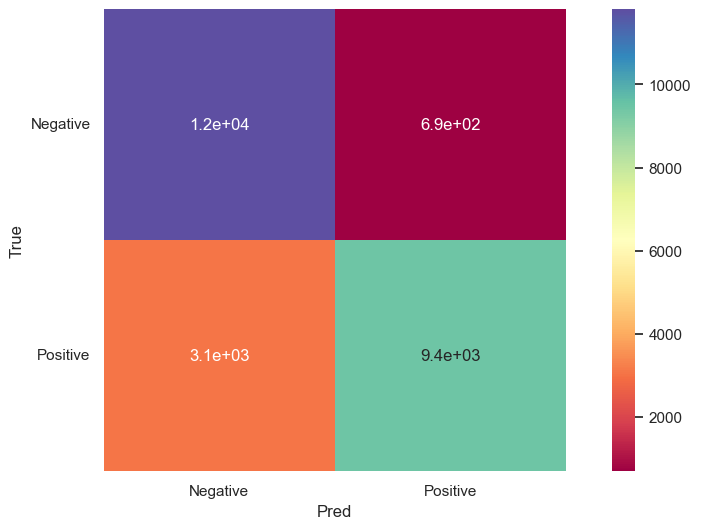

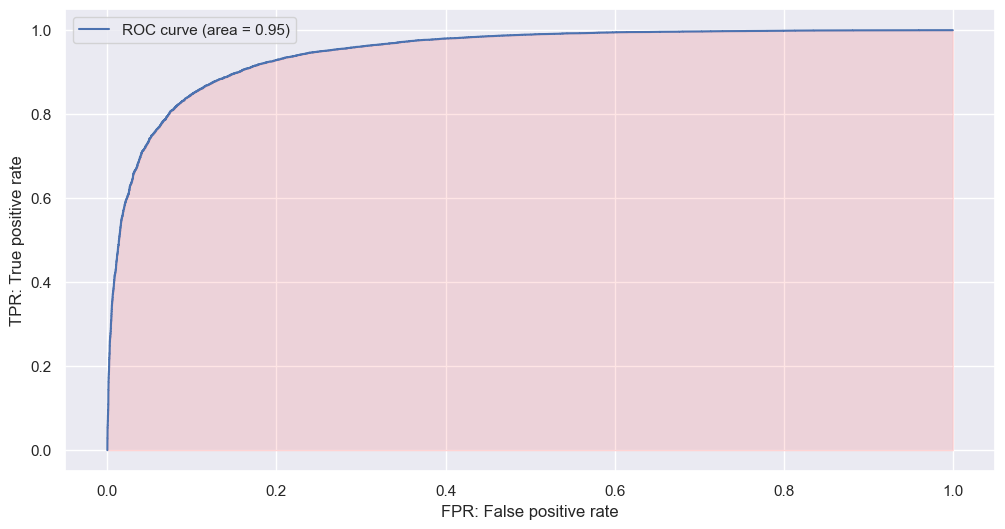

In [18]:
make_report(model, test_data, test_labels, "Negative", "Positive")